## 2D lattice 그리기

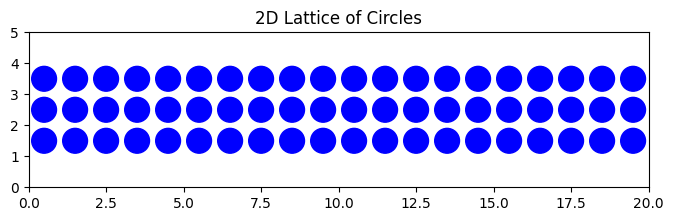

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width = 20  # Size of the square lattice (N x N)
height = 5
atom_radius = 0.4  # Radius of the atom circles

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Function to initialize the lattice
def init_lattice(width, height):
    lattice = np.ones((height, width), dtype=int)
    return lattice

# Function to plot the lattice of circles
def plot_lattice(lattice, atom_radius):
    for x in range(width):
        for y in range(height):
            if lattice[y, x] == 1:
                circle = plt.Circle((x + 0.5, y + 0.5), atom_radius, color='blue')
                ax.add_artist(circle)

# Initialize the lattice
lattice = init_lattice(width, height)
lattice[0, :] = 0
lattice[-1, :] = 0
# Mark specific lattice sites as occupied (atoms)
# For example, mark the center and corners as occupied:
# lattice[N % 2, N % 2] = 1
# lattice[0, 0] = 1
# lattice[0, N - 1] = 1
# lattice[N - 1, 0] = 1
# lattice[N - 1, N - 1] = 1

# Plot the lattice of circles
plot_lattice(lattice, atom_radius)

# Set the axis limits and display the plot
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')  # Ensure equal aspect ratio for circles

plt.title("2D Lattice of Circles")
plt.show()


## 2D lattice 그리고 diffusion까지

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl

# Parameters
width = 100  # Size of the square lattice (height x width)
height = 5
n_vacancies = 10  # Number of vacancies
rate_3to0 = 0.1  # Diffusion rate
atom_radius = 0.4

# Initialize the lattice
lattice = np.zeros((height+2, width), dtype=int)

# Randomly place vacancies in the lattice
for _ in range(n_vacancies):
    x = np.random.randint(0, height)
    y = np.random.randint(0, width)
    lattice[x, y] = 1

# Function to perform vacancy diffusion
def diffuse_vacancies(lattice, rate_3to0):
    new_lattice = lattice.copy()
    for x in range(height):
        for y in range(width):
            if lattice[x, y] == 1:
                # Randomly choose a neighboring site
                dx, dy = np.random.choice([-1, 0, 1], 2)
                new_x, new_y = (x + dx) % height, (y + dy) % width
                # Check if the neighboring site is empty
                if lattice[new_x, new_y] == 0:
                    # Move the vacancy to the neighboring site
                    new_lattice[x, y] = 0
                    new_lattice[new_x, new_y] = 1
    return new_lattice

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Function to update the lattice in the animation
def update(frame):
    ax.clear()
    draw_lattice()
    ax.set_title(f"Time step {frame}")
    lattice[:] = diffuse_vacancies(lattice, rate_3to0)

# # Create the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=200, blit=False)
ani.save('atom_diffusion_animation.gif', writer='pillow', fps=10)
def draw_lattice():
    for x in range(width):
        for y in range(height):
            if lattice[y, x] == 0:
                    circle = plt.Circle((x + 0.5, y + 0.5), atom_radius, color='blue')
                    ax.add_artist(circle)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height+2)
    ax.axis('off')
    ax.set_aspect('equal')
# draw_lattice()

(5, 20)

# 하나씩 차근차근 해보아요

#### 1. setting

In [51]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
%matplotlib ipympl

In [52]:
def get_site_energy(bond_energy, bond_num):
    return -bond_num * bond_energy/2

def get_activation_energy(e_start, e_end, alpha = 0.1, e0 = 0):
    e_reaction = e_end-e_start
    if e_reaction>=0:
        return e0 + (1+alpha)*e_reaction
    else:
        return e0 + alpha*e_reaction

def get_diffusion_rate(e_a, T=300, f=1):
    k_B = 8.617333262145e-5  # Boltzmann constant in eV/K
    return f*np.exp(-e_a/(k_B*T))

In [53]:
# default Parameters
# Size of the square lattice (height x width)
width = 100  
height = 10

# parameter for diffusion rate
bond_energy = 10 #eV
temperature = 300

# site energy, e_(bond number)
e_0 = get_site_energy(bond_energy, 0)   
e_1 = get_site_energy(bond_energy, 1)
e_2 = get_site_energy(bond_energy, 2)
e_3 = get_site_energy(bond_energy, 3)

# activation energy, e_a_(start to end)
e_a_3to0 = get_activation_energy(e_3, e_0)
e_a_0to3 = get_activation_energy(e_0, e_3)
e_a_2to3 = get_activation_energy(e_2, e_3)
e_a_3to2 = get_activation_energy(e_3, e_2)
e_a_3to3 = get_activation_energy(e_3, e_3)

# diffusion rate, rate_(start to end)
rate_3to0 = get_diffusion_rate(e_a_3to0, temperature)     
rate_0to3 = get_diffusion_rate(e_a_0to3, temperature)              
rate_2to3 = get_diffusion_rate(e_a_2to3, temperature)            
rate_3to2 = get_diffusion_rate(e_a_3to2, temperature)        
rate_3to3 = get_diffusion_rate(e_a_3to3, temperature)     

# atom_radius = 0.4
steps = 100
t = 0

In [62]:
print(e_a_0to3, '\t',  rate_0to3)
print(e_a_3to0, '\t',  rate_3to0)
print(e_a_2to3, '\t',  rate_2to3)
print(e_a_3to2, '\t',  rate_3to2)
print(e_a_3to3, '\t',  rate_3to3)

-1.5 	 1.5808509577338266e+25
16.5 	 6.489329204651446e-278
-0.5 	 250974910.9980909
5.5 	 4.018524330830878e-93
0.0 	 1.0


In [63]:
# function to initialize the lattice
'''
Initialize the lattice
1 : atom
0 : vacancy or vacumm
'''
def init_lattice(width, height):
    lattice = np.ones((height+2, width), dtype=int)
    lattice[0, :] = 0
    lattice[-1, :] = 0

    return lattice

In [64]:
# Function to plot the lattice of circles
def plot_lattice(ax, width, height, atom_radius, lattice):
    for x in range(width):
        for y in range(height+2):
            if lattice[y, x] == 1:
                circle = plt.Circle((x + 0.5, y + 0.5), atom_radius, color='blue')
                ax.add_artist(circle)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height+2)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout(pad=0.5)

In [65]:
'''
function that finds every possible way
current state
1. atom jump at surface
2. return to previous position(jumped from surface)
3. atom jump from side
'''
def get_atoms_around_site(lattice, x, y, total=False):
    height, width = lattice.shape
    # calculate bond number
    if y == height-1:
        down = 0
    else:
        down = lattice[y+1, x]
    if y == 0:
        up = 0
    else:
        up = lattice[y-1, x]
    # PBC at left and right
    right = lattice[y, (x+1)%width]
    left = lattice[y, (x-1)%width]
    
    if total:
        return left+up+right+down
    else:
        return left, up, right, down

def find_candidate(lattice):
    global rate_0to3
    global rate_2to3
    global rate_3to0
    global rate_3to2
    global rate_3to3
    height, width = lattice.shape
    candidate_table = []
    diffusion_table = []
    motion_table = []
    for x in range(width):
        for y in range(height):
            # find atom(value 1)
            if lattice[y, x] == 1:
                left, up, right, down = get_atoms_around_site(lattice, x, y)
                bond_num = down + up + right + left
                # print(bond_num)
                # classify the atoms by bond_num
                # 0 bond num : jumped atom from surface
                if bond_num == 0:
                    candidate_table.append((y, x))
                    diffusion_table.append(rate_0to3)
                    if y == height-1 :
                        motion_table.append(2)
                    else :
                        motion_table.append(4)
                # 2 bond num : surface atom next to vacancy
                elif bond_num == 2:
                    # print('find')
                    candidate_table.append((y, x))
                    diffusion_table.append(rate_2to3)
                    if left == 0 :
                        motion_table.append(1)
                    else:
                        motion_table.append(3)
                # 3 bond num
                # 3-1. surface atom
                elif bond_num == 3:
                    candidate_table.append((y, x))
                    if left == 0 :
                        num_next_site_bond = get_atoms_around_site(lattice, (x-1+width)%width, y, total=True)
                        motion_table.append(1)
                    elif up == 0 :
                        num_next_site_bond = get_atoms_around_site(lattice, x, y-1, total=True)
                        motion_table.append(2)
                    elif right == 0 :
                        num_next_site_bond = get_atoms_around_site(lattice, (x+1+width)%width, y, total=True)
                        motion_table.append(3)
                    else:
                        num_next_site_bond = get_atoms_around_site(lattice, x, y+1, total=True)
                        motion_table.append(4)
                    
                    if num_next_site_bond == 0:
                        diffusion_table.append(rate_3to0)
                    elif num_next_site_bond == 2:
                        diffusion_table.append(rate_3to2)
                    else:
                        diffusion_table.append(rate_3to3)
                
    
    return candidate_table, diffusion_table, motion_table

In [66]:
# KMC function
def diffuse_one_step(lattice, print_out=False):
    cand, dif, motion = find_candidate(lattice)
    dif = np.array(dif)

    total_dif = np.sum(dif)
    
    # pick 1
    u = np.random.uniform(low=1e-6, high=1)
    cum_dif = np.cumsum(dif)

    chosen_idx = np.argwhere(u*total_dif < cum_dif)[0][0]

    # print information
    print(f'total_diff : {total_dif}')
    if print_out:
        print(f'chosen : {cand[chosen_idx]} atom')   
    # print(f'motion : {motion[chosen_idx]}')
    # print(cand[chosen_idx])
    # print(motion[chosen_idx])

    # change the lattice
    x, y = cand[chosen_idx][0], cand[chosen_idx][1]

    # get motion
    if motion[chosen_idx] == 1:
        lattice[x, y] = 0
        lattice[x, (y-1+width)%width] = 1
        if print_out:
            print(f'go left')   
    if motion[chosen_idx] == 2:
        lattice[x, y] = 0
        lattice[x-1 , y] = 1
        if print_out:
            print(f'go up')   
    if motion[chosen_idx] == 3:
        lattice[x, y] = 0
        lattice[x, (y+1)%width] = 1
        if print_out:
            print(f'go right')   
    if motion[chosen_idx] == 4:
        lattice[x, y] = 0
        lattice[x+1 , y] = 1
        if print_out:
            print(f'go down')   
    

## Animation using text(fast)
---

In [69]:
# default Parameters
# Size of the square lattice (height x width)
width = 100  
height = 10

# parameter for diffusion rate
bond_energy = 10 #eV
temperature = 300

# site energy, e_(bond number)
e_0 = get_site_energy(bond_energy, 0)   
e_1 = get_site_energy(bond_energy, 1)
e_2 = get_site_energy(bond_energy, 2)
e_3 = get_site_energy(bond_energy, 3)

# activation energy, e_a_(start to end)
e_a_3to0 = get_activation_energy(e_3, e_0)
e_a_0to3 = get_activation_energy(e_0, e_3)
e_a_2to3 = get_activation_energy(e_2, e_3)
e_a_3to2 = get_activation_energy(e_3, e_2)
e_a_3to3 = get_activation_energy(e_3, e_3)

# diffusion rate, rate_(start to end)
rate_3to0 = get_diffusion_rate(e_a_3to0, temperature)     
rate_0to3 = get_diffusion_rate(e_a_0to3, temperature)              
rate_2to3 = get_diffusion_rate(e_a_2to3, temperature)            
rate_3to2 = get_diffusion_rate(e_a_3to2, temperature)        
rate_3to3 = get_diffusion_rate(e_a_3to3, temperature)     

# atom_radius = 0.4
steps = 1000
t = 0

In [70]:
'''
text-based simulation
'''

def draw_lattice(lattice):
    height, width = lattice.shape
    for y in range(height):
        for x in range(width):
            if lattice[y, x] == 1:
                print('●', end = '')
            else:
                print(' ', end='')
        print('\n')
    

lattice = init_lattice(width, height)
for i in range(1, steps+1):
    print(f'---------------- step {i} ---------------------')
    diffuse_one_step(lattice, True)
    draw_lattice(lattice)
    time.sleep(0.4)
    # os.system('clear')
    clear_output(wait=True)
    # fig, ax = plt.subplots(figsize=(10, 2))
    # plot_lattice(ax, width, height, atom_radius, lattice)


---------------- step 323 ---------------------
total_diff : 200.0
chosen : (10, 19) atom
go down
                                                                                                    

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●

## Animation using Matplotlib
---

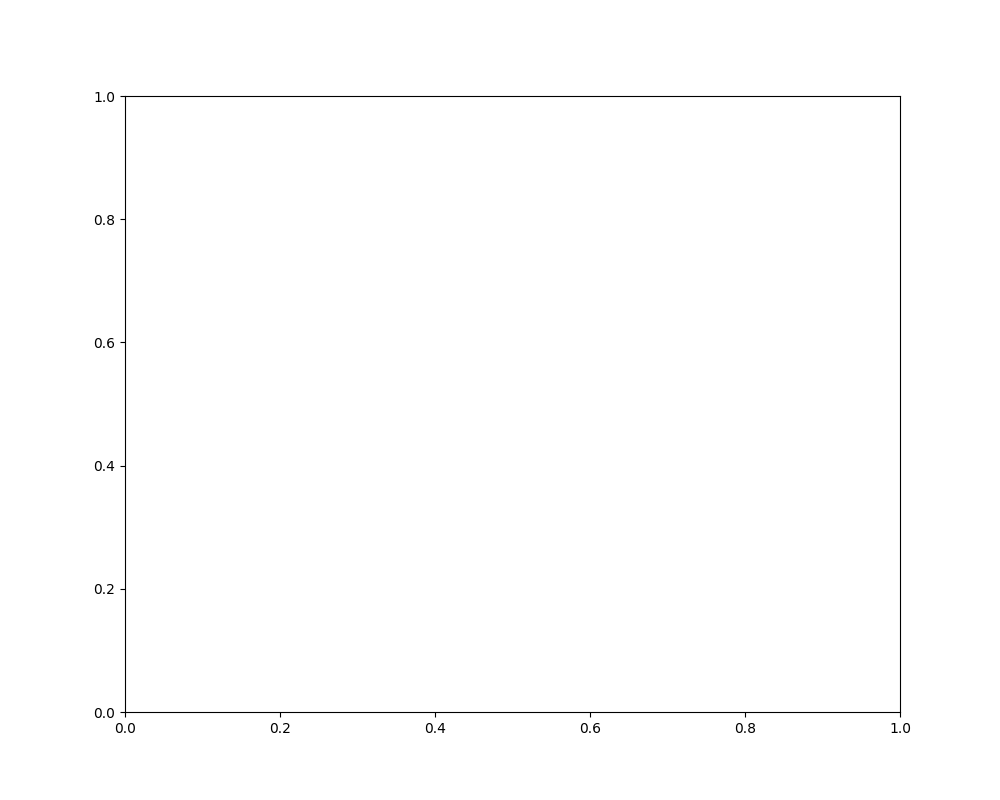

In [36]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# initialize lattice
lattice = init_lattice(width, height)

# Function to update the lattice in the animation
def update(frame):
    ax.clear()
    plot_lattice(ax, width, height, atom_radius, lattice)
    ax.set_title(f"Time step {frame}")
    diffuse_one_step(lattice)

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames = 500, interval=500, blit=False)
# ani.frame_seq = ani.new_frame_seq() 
# ani.save('test.gif', writer='pillow', fps=10)
# plt.show()

In [19]:
# ani.save('test2.gif', writer='pillow', fps=10)